In [4]:
import pandas as pd
df = pd.read_csv("heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
# 異常値の削除
df = df[df['ca'] < 4] #drop the wrong ca values
df = df[df['thal'] > 0] # drop the wong thal value
 
# カラム名をもっとわかりやすい名前に変換
df = df.rename(columns = {'cp':'chest_pain_type', 'trestbps':'resting_blood_pressure', 'chol': 'cholesterol','fbs': 'fasting_blood_sugar', 
                       'restecg' : 'rest_electrocardiographic', 'thalach': 'max_heart_rate_achieved', 'exang': 'exercise_induced_angina',
                       'oldpeak': 'st_depression', 'slope': 'st_slope', 'ca':'num_major_vessels', 'thal': 'thalassemia'}, errors="raise")
 
# 質的変数の値がintegerになっているので，文字列にする(ついでにわかりやすい値を入れる
df['sex'][df['sex'] == 0] = 'female'
df['sex'][df['sex'] == 1] = 'male'
 
df['chest_pain_type'][df['chest_pain_type'] == 0] = 'typical angina'
df['chest_pain_type'][df['chest_pain_type'] == 1] = 'atypical angina'
df['chest_pain_type'][df['chest_pain_type'] == 2] = 'non-anginal pain'
df['chest_pain_type'][df['chest_pain_type'] == 3] = 'asymptomatic'
 
df['fasting_blood_sugar'][df['fasting_blood_sugar'] == 0] = 'lower than 120mg/ml'
df['fasting_blood_sugar'][df['fasting_blood_sugar'] == 1] = 'greater than 120mg/ml'
 
df['rest_electrocardiographic'][df['rest_electrocardiographic'] == 0] = 'normal'
df['rest_electrocardiographic'][df['rest_electrocardiographic'] == 1] = 'ST-T wave abnormality'
df['rest_electrocardiographic'][df['rest_electrocardiographic'] == 2] = 'left ventricular hypertrophy'
 
df['exercise_induced_angina'][df['exercise_induced_angina'] == 0] = 'no'
df['exercise_induced_angina'][df['exercise_induced_angina'] == 1] = 'yes'
 
df['st_slope'][df['st_slope'] == 0] = 'upsloping'
df['st_slope'][df['st_slope'] == 1] = 'flat'
df['st_slope'][df['st_slope'] == 2] = 'downsloping'
 
df['thalassemia'][df['thalassemia'] == 1] = 'fixed defect'
df['thalassemia'][df['thalassemia'] == 2] = 'normal'
df['thalassemia'][df['thalassemia'] == 3] = 'reversable defect'
 
#質的変数をダミー変数にする
df = pd.get_dummies(df, drop_first=True)
df.head()

/var/folders/cb/6ts7h6pd6kldh4qftxfr3xf00000gn/T/ipykernel_90969/2491321682.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sex'][df['sex'] == 0] = 'female'
/var/folders/cb/6ts7h6pd6kldh4qftxfr3xf00000gn/T/ipykernel_90969/2491321682.py:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'female' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df['sex'][df['sex'] == 0] = 'female'
/var/folders/cb/6ts7h6pd6kldh4qftxfr3xf00000gn/T/ipykernel_90969/2491321682.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-cop

,age,resting_blood_pressure,cholesterol,max_heart_rate_achieved,st_depression,num_major_vessels,target,sex_male,chest_pain_type_atypical angina,chest_pain_type_non-anginal pain,chest_pain_type_typical angina,fasting_blood_sugar_lower than 120mg/ml,rest_electrocardiographic_left ventricular hypertrophy,rest_electrocardiographic_normal,exercise_induced_angina_yes,st_slope_flat,st_slope_upsloping,thalassemia_normal,thalassemia_reversable defect
0,63,145,233,150,2.3,0,1,True,False,False,False,False,False,True,False,False,True,False,False
1,37,130,250,187,3.5,0,1,True,False,True,False,True,False,False,False,False,True,True,False
2,41,130,204,172,1.4,0,1,False,True,False,False,True,False,True,False,False,False,True,False
3,56,120,236,178,0.8,0,1,True,True,False,False,True,False,False,False,False,False,True,False
4,57,120,354,163,0.6,0,1,False,False,False,True,True,False,False,True,False,False,True,False


In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = df.loc[:, df.columns != "target"]
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
model = LogisticRegression(solver="liblinear")
model.fit(X_train, y_train)

y_pred_proba = model.predict_proba(X_test)

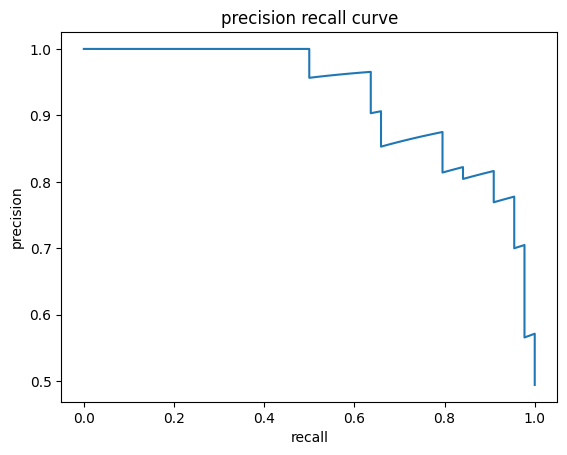

In [13]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
%matplotlib inline

pos_prob = model.predict_proba(X_test)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, pos_prob)

plt.plot(recall, precision)
plt.xlabel("recall")
plt.ylabel("precision")
plt.title("precision recall curve")
plt.show()

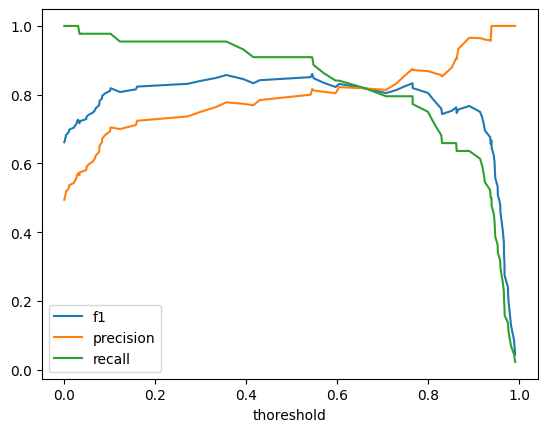

In [19]:
from scipy.stats import hmean

f1_scores = []
for p, r in zip(precision, recall):
    f1 = hmean([p, r])
    f1_scores.append(f1)

plt.plot(thresholds, f1_scores[:-1], label="f1")
plt.plot(thresholds, precision[:-1], label="precision")
plt.plot(thresholds, recall[:-1], label="recall")
plt.xlabel("thoreshold")
plt.legend()


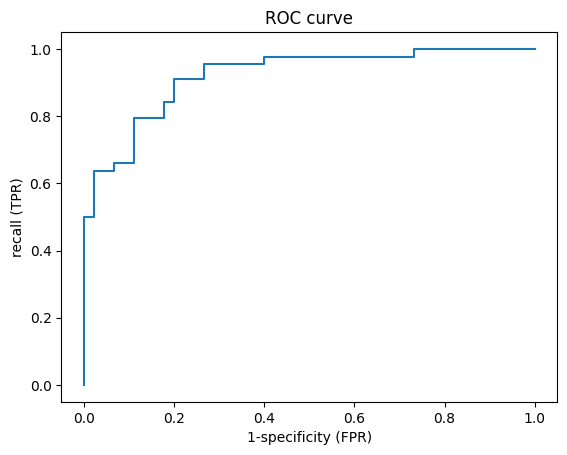

In [21]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, pos_prob)

plt.plot(fpr, tpr)
plt.xlabel("1-specificity (FPR)")
plt.ylabel("recall (TPR)")
plt.title("ROC curve")
plt.show()

In [22]:
from sklearn.metrics import auc
auc(fpr, tpr)

0.9207070707070707